In [2]:
import numpy as np


In [3]:
from gensim.models import Word2Vec,KeyedVectors
import gensim.downloader as api
import pandas as pd
import gensim
import nltk

In [4]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [5]:
file_path=r"E:\Machine_learning_practical\IMDB Dataset.csv"

In [6]:
df=pd.read_csv(file_path)

In [7]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [10]:
df.replace({'sentiment':{'positive':1,'negative':0}},inplace=True)

C:\Users\hi\AppData\Local\Temp\ipykernel_11056\2906463383.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sentiment':{'positive':1,'negative':0}},inplace=True)


In [11]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [1]:
from sklearn.model_selection import train_test_split

In [12]:
train_data,test_data=train_test_split(df,test_size=0.2,random_state=42)

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
X_train=pad_sequences(tokenizer.texts_to_sequences(train_data['review']),maxlen=200)
X_test=pad_sequences(tokenizer.texts_to_sequences(test_data['review']),maxlen=200)

Matplotlib is building the font cache; this may take a moment.


In [14]:
y_train=train_data['sentiment']
y_test=test_data['sentiment']

Training SimpleRNN model...
Epoch 1/5
875/875 - 33s - 38ms/step - accuracy: 0.5591 - loss: 0.6980 - val_accuracy: 0.6467 - val_loss: 0.6435
Epoch 2/5
875/875 - 33s - 38ms/step - accuracy: 0.6915 - loss: 0.5787 - val_accuracy: 0.6400 - val_loss: 0.6341
Epoch 3/5
875/875 - 33s - 38ms/step - accuracy: 0.6608 - loss: 0.6085 - val_accuracy: 0.6768 - val_loss: 0.5994
Epoch 4/5
875/875 - 33s - 37ms/step - accuracy: 0.7502 - loss: 0.5163 - val_accuracy: 0.7718 - val_loss: 0.4942
Epoch 5/5
875/875 - 33s - 38ms/step - accuracy: 0.7985 - loss: 0.4528 - val_accuracy: 0.7942 - val_loss: 0.4712
Training GRU model...
Epoch 1/5
875/875 - 102s - 116ms/step - accuracy: 0.8018 - loss: 0.4285 - val_accuracy: 0.8593 - val_loss: 0.3265
Epoch 2/5
875/875 - 101s - 116ms/step - accuracy: 0.8991 - loss: 0.2510 - val_accuracy: 0.8901 - val_loss: 0.2652
Epoch 3/5
875/875 - 131s - 150ms/step - accuracy: 0.9274 - loss: 0.1916 - val_accuracy: 0.8874 - val_loss: 0.2821
Epoch 4/5
875/875 - 133s - 152ms/step - accuracy

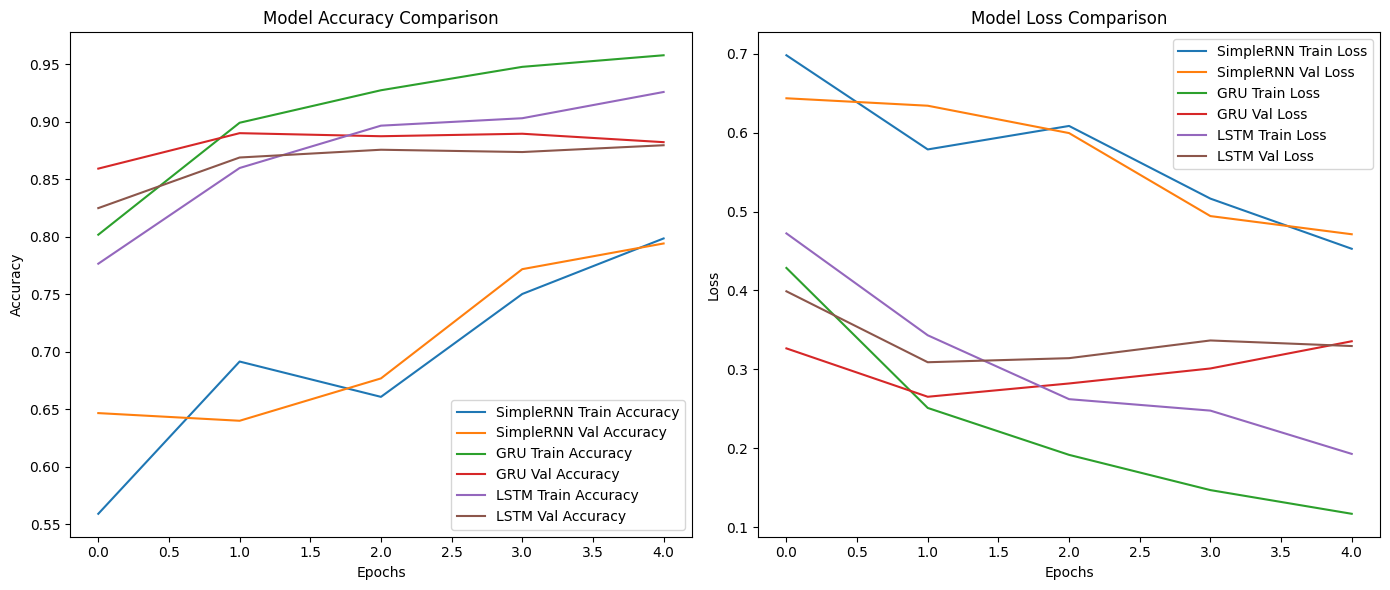

Evaluating SimpleRNN model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7912 - loss: 0.4784
Test accuracy for SimpleRNN: 0.7979000210762024
Evaluating GRU model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8879 - loss: 0.3139
Test accuracy for GRU: 0.8878999948501587
Evaluating LSTM model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.8820 - loss: 0.3168
Test accuracy for LSTM: 0.8848999738693237


In [21]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,AdamW
from tensorflow.keras.regularizers import l2

vocab_size=10000
embedding_dim=200
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

def build_model(rnn_layer, 
                vocab_size=5000, 
                embedding_dim=128, 
                use_pretrained=False, 
                embedding_matrix=None, 
                dropout_rate=0.3, 
                l2_reg=1e-4):

    model = Sequential()

    # Embedding Layer
    if use_pretrained and embedding_matrix is not None:
        model.add(Embedding(input_dim=vocab_size, 
                            output_dim=embedding_dim,
                            weights=[embedding_matrix],
                            trainable=False))
    else:
        model.add(Embedding(input_dim=vocab_size, 
                            output_dim=embedding_dim))

    # RNN Layer
    model.add(rnn_layer(128, dropout=dropout_rate, return_sequences=False))
    
    # Optional: More Dropout to prevent overfitting
    model.add(Dropout(dropout_rate))

    # Output Layer with L2 regularization
    model.add(Dense(1, 
                    activation='sigmoid',
                    kernel_regularizer=l2(l2_reg)))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


# Define RNN layers for comparison
rnn_types = {
    "SimpleRNN": SimpleRNN,
    "GRU": GRU,
    "LSTM": LSTM
}

# History dictionary to store training results
history_dict = {}



# Train models
for rnn_name, rnn_layer in rnn_types.items():
    print(f"Training {rnn_name} model...")
    model = build_model(rnn_layer)
    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.3, verbose=2)  # Train for 5 epochs
    history_dict[rnn_name] = history

# Plot the results
plt.figure(figsize=(14, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
for rnn_name, history in history_dict.items():
    plt.plot(history.history['accuracy'], label=f'{rnn_name} Train Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{rnn_name} Val Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
for rnn_name, history in history_dict.items():
    plt.plot(history.history['loss'], label=f'{rnn_name} Train Loss')
    plt.plot(history.history['val_loss'], label=f'{rnn_name} Val Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate models on test set
for rnn_name, rnn_layer in rnn_types.items():
    print(f"Evaluating {rnn_name} model...")
    # Get the trained model from the history dictionary instead of recreating it
    model = history_dict[rnn_name].model   # Set model weights after training
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Test accuracy for {rnn_name}: {test_acc}")
